# The Burguers' equation

Equation for Horizontal Velocity (u):

$$
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}= \nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)
$$

Equation for Vertical Velocity (v):

$$
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}= \nu \left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)
$$

## Discretização por diferenças finitas

Equation for Horizontal Velocity (u):

$$
\left.\begin{matrix}
    {f}''\simeq \frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\
    {f}'\simeq \frac{f(x+h)-f(x)}{h}
    \end{matrix}\right\}
    \frac{u(x,y,t+h_t)-u}{h_t}+u\frac{u(x+h_x,y,t)-u}{h_x}+v\frac{u(x,y+h_y,t)-u}{h_y}\simeq \nu \left(\frac{u(x+h_x,y,t)-2u+u(x-h_x,y,t)}{h_x^2}+\frac{u(x,y+h_y,t)-2u+u(x,y-h_y,t)}{h_y^2}\right)\therefore\\
    u(x,y,t+h_t)\simeq h_t\left[\nu \left(\frac{u(x+h_x,y,t)-2u+u(x-h_x,y,t)}{h_x^2}+\frac{u(x,y+h_y,t)-2u+u(x,y-h_y,t)}{h_y^2}\right)-u\frac{u(x+h_x,y,t)-u}{h_x}-v\frac{u(x,y+h_y,t)-u}{h_y}\right]+u
$$

Equation for Vertical Velocity (v):

$$
\left.\begin{matrix}
    {f}''\simeq \frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\
    {f}'\simeq \frac{f(x+h)-f(x)}{h}
    \end{matrix}\right\}
    \frac{v(x,y,t+h_t)-v}{h_t}+u\frac{v(x+h_x,y,t)-v}{h_x}+v\frac{v(x,y+h_y,t)-v}{h_y}\simeq \nu \left(\frac{v(x+h_x,y,t)-2v+v(x-h_x,y,t)}{h_x^2}+\frac{v(x,y+h_y,t)-2v+v(x,y-h_y,t)}{h_y^2}\right)\therefore\\
    v(x,y,t+h_t)\simeq h_t\left[\nu \left(\frac{v(x+h_x,y,t)-2v+v(x-h_x,y,t)}{h_x^2}+\frac{v(x,y+h_y,t)-2v+v(x,y-h_y,t)}{h_y^2}\right)-u\frac{v(x+h_x,y,t)-v}{h_x}-v\frac{v(x,y+h_y,t)-v}{h_y}\right]+v
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nt = 500
nx = 51
ny = 51

nu = 0.1

h_t = 0.001
h_x = 2

L = 2
h_x = L / (nx - 1)
h_y = L / (ny - 1)

In [3]:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)

In [4]:
grid = np.zeros((ny, nx))
grid.shape

(51, 51)

In [5]:
u = np.ones((ny, nx))
v = np.ones((ny, nx))

u_new = np.zeros((ny, nx))
v_new = np.zeros((ny, nx))

uf = np.ones((nt, ny, nx))
vf = np.ones((nt, ny, nx))

In [6]:
# I.C.

u[int(0.75 / h_x) : int(1.25 / h_x + 1), int(0.75 / h_y) : int(1.25 / h_y + 1)] = 5
v[int(0.75 / h_x) : int(1.25 / h_x + 1), int(0.75 / h_y) : int(1.25 / h_y + 1)] = 5


uf[0, int(0.75 / h_x) : int(1.25 / h_x + 1), int(0.75 / h_y) : int(1.25 / h_y + 1)] = 5
vf[0, int(0.75 / h_x) : int(1.25 / h_x + 1), int(0.75 / h_y) : int(1.25 / h_y + 1)] = 5

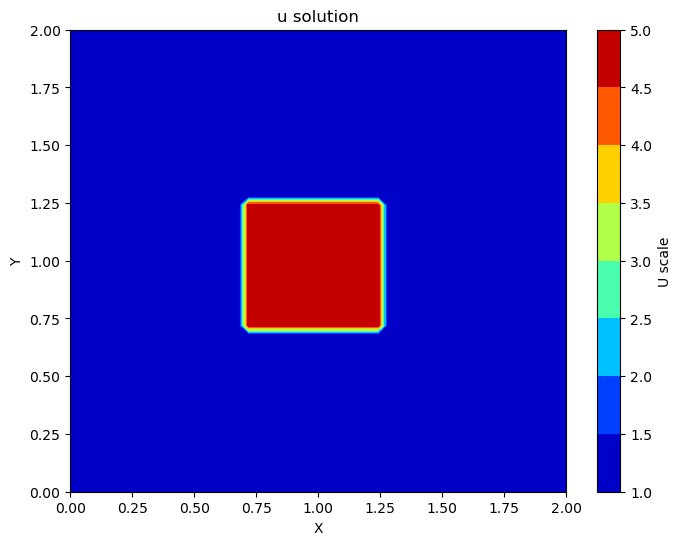

In [7]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, uf[0, :, :], cmap="jet")
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colobar = plt.colorbar(contour)
colobar.set_label("U scale")

In [8]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = (
                (
                    un[i, j]
                    - (un[i, j] * h_t / h_x * (un[i, j] - un[i - 1, j]))
                    - vn[i, j] * h_t / h_y * (un[i, j] - un[i, j - 1])
                )
                + (nu * h_t / (h_x**2)) * (un[i + 1, j] - 2 * un[i, j] + un[i - 1, j])
                + (nu * h_t / (h_x**2)) * (un[i, j - 1] - 2 * un[i, j] + un[i, j + 1])
            )
            v[i, j] = (
                (
                    vn[i, j]
                    - (un[i, j] * h_t / h_x * (vn[i, j] - vn[i - 1, j]))
                    - vn[i, j] * h_t / h_y * (vn[i, j] - vn[i, j - 1])
                )
                + (nu * h_t / (h_x**2)) * (vn[i + 1, j] - 2 * vn[i, j] + vn[i - 1, j])
                + (nu * h_t / (h_x**2)) * (vn[i, j - 1] - 2 * vn[i, j] + vn[i, j + 1])
            )
            uf[n, i, j] = u[i, j]
            vf[n, i, j] = v[i, j]
    u[:, 0] = 1
    u[:, -1] = 1
    u[0, :] = 1
    u[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    v[0, :] = 1
    v[-1, :] = 1

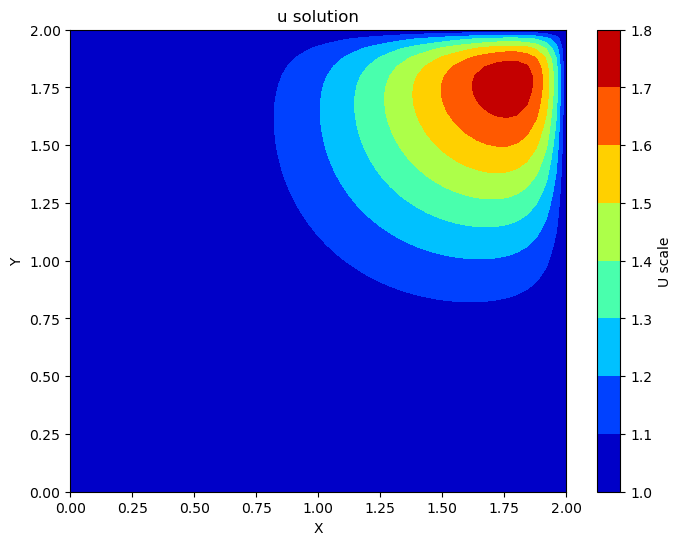

In [9]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, uf[-1, :, :], cmap="jet")
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colobar = plt.colorbar(contour)
colobar.set_label("U scale")

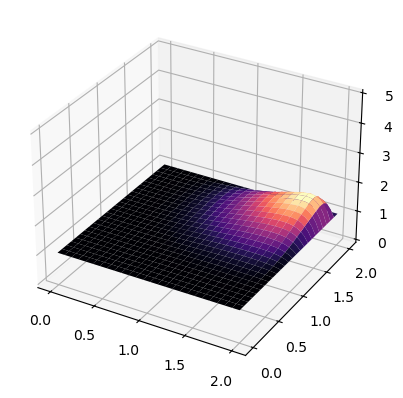

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(x, y)
zarray = np.zeros((len(x), len(y), nt))

for i in range(nt):
    zarray[:, :, i] = uf[i, :, :]

# Plot the surface.
plot = [ax.plot_surface(X, Y, zarray[:, :, 0], color="0.75", rstride=1, cstride=1)]
ax.set_zlim(0, 5)


def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:, :, frame_number], cmap="magma")


animate = animation.FuncAnimation(
    fig, update_plot, nt, interval=40, fargs=(zarray, plot)
)
# To save the animation, use e.g.
#
animate.save("numerical_burguers_surface.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()